# Harvesting log file metadata

[ Do NOT run and update this notebook itself (except when actually amending or improving it).   Instead, use the "Duplicate" option to make a copy, and use that to do visual validation. ]

## Standard startup

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
top='/groups/astro/buks/codes/dispatch2/'            # aake
#top='/groups/astro/xxxx/codes/dispatch2/'                  # xxxx

In [8]:
import os
os.chdir(top+'experiments/ISM/python')
import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.graphics as dgr

## Accessing tagged metadata in rank log files

In [4]:
dis.logdata()

syntax: logdata(run,tag,[col0,col1,...]{,file='filename'})


Giving either a (run,tag) argument or a (file='filename',tag='some_tag') argument, one gets a sample line with enumerated columns to choose from:

In [5]:
dis.logdata('tmp1','sink_t%accrete:')

sink_t%accrete: id,nm,time,rpos,vel,m,dmdt,d_max =   1517   174  8.5165E-07  -0.406  -0.031  -0.781     0.000   0.000   0.000    0.00E+00  0.00E+00  1.01E+09
              0                                1 2      3     4           5       6       7       8         9      10      11          12        13        14 
syntax: logdata(run,tag,[col0,col1,...]{,file='filename'})


In [6]:
dis.logdata(file='../data/tmp1/rank_00000.log',tag='sink_t%accrete:')

sink_t%accrete: id,nm,time,rpos,vel,m,dmdt,d_max =   1517   174  8.5165E-07  -0.406  -0.031  -0.781     0.000   0.000   0.000    0.00E+00  0.00E+00  1.01E+09
              0                                1 2      3     4           5       6       7       8         9      10      11          12        13        14 
syntax: logdata(run,tag,[col0,col1,...]{,file='filename'})


Add a columns argument, and the procedure returns a result with shape (n_col,n_row)

In [7]:
r=dis.logdata('tmp1','sink_t%accrete:',[3,5,12,13,14])
r.shape

(5, 18472)

Here's how to select only the rows where the 0th columns has a certain value:

In [8]:
w=where(r[0]==1853.)
t,m,dm,d=r[1:,w].squeeze()

Scaling parameters are available in snapshot attributes:

In [9]:
sn=dis.snapshot(223,'tmp1')
scaling_msun=sn.scaling.m/sn.cgs.m_sun
scaling_yr=sn.scaling.t/sn.cgs.yr
scaling_dmdt=scaling_msun/scaling_yr

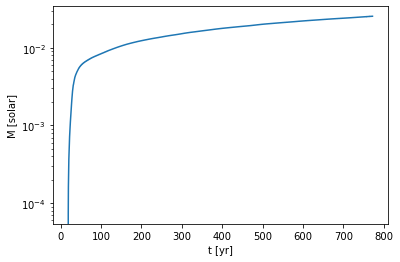

In [10]:
semilogy(t*scaling_yr,m*scaling_msun); xlabel('t [yr]'); ylabel('M [solar]');

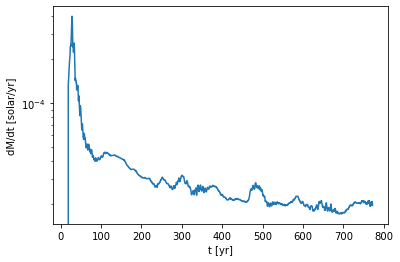

In [11]:
semilogy(t*scaling_yr,dm*scaling_dmdt); xlabel('t [yr]'); ylabel('dM/dt [solar/yr]');

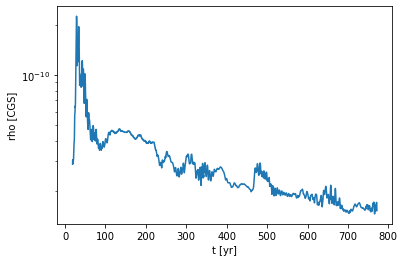

In [12]:
semilogy(t*scaling_yr,d*sn.scaling.d); xlabel('t [yr]'); ylabel('rho [CGS]');

In [4]:
sns={}
sns[222]=dis.snapshot(222,'core_13',data='../../ramses_snapshots/data/')

In [6]:
for io in range(224,259,2):
    sn=dis.snapshot(io,'sink_13',data='../data')
    sns[io]=sn

directory ../data/sink_13/00232/ has no snapshot.nml file
directory ../data/sink_13/00234/ does not exist
directory ../data/sink_13/00236/ does not exist
directory ../data/sink_13/00238/ does not exist
directory ../data/sink_13/00240/ does not exist
directory ../data/sink_13/00242/ does not exist
directory ../data/sink_13/00244/ does not exist
directory ../data/sink_13/00246/ does not exist
directory ../data/sink_13/00248/ does not exist
directory ../data/sink_13/00250/ does not exist
directory ../data/sink_13/00252/ does not exist
directory ../data/sink_13/00254/ does not exist
directory ../data/sink_13/00256/ does not exist
directory ../data/sink_13/00258/ does not exist


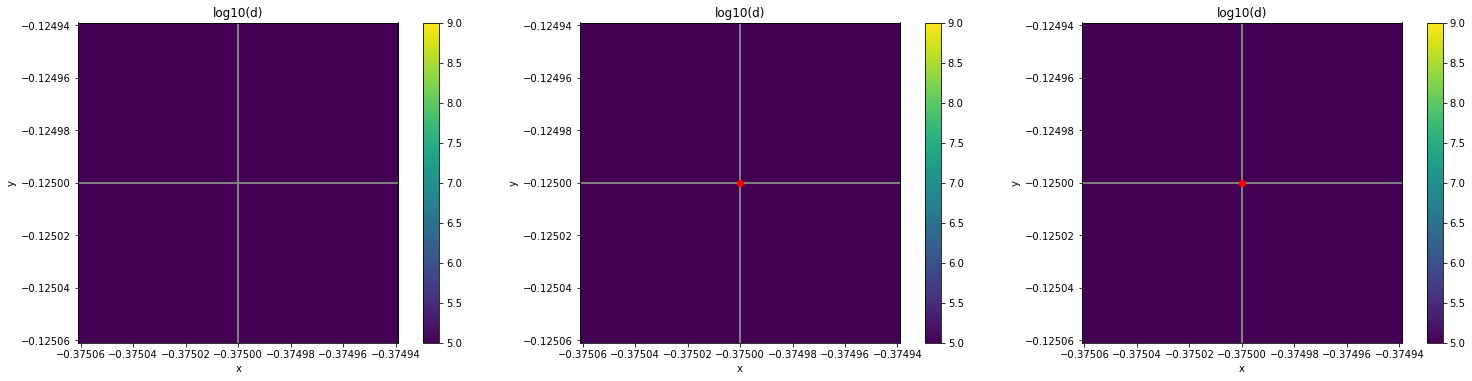

In [27]:
axis=2
npix=128
level=20
w=npix*0.5**level
color='red'
value='logd'; title='log10(d)'; vv=[5,9]
figure(figsize(35,10))
i=0
for io in range(222,234,4):
    sn=sns[io]
    c=sn.patchid[5].position
    i+=1; subplot(2,5,i)
    dgr.amr_plane(sn,value,center=c,axis=axis,width=w,lmax=20,mesh=1,ident=0,title=title,vmin=vv[0],vmax=vv[1])
    if io>222:
        if axis==0: plot(c[1],c[2],'o',color=color);    
        if axis==1: plot(c[0],c[2],'o',color=color);
        if axis==2: plot(c[0],c[1],'o',color=color);